In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import warnings
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

Using TensorFlow backend.


In [2]:
classes = [
    'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1',
    'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3',
    'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3',
    'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6',
    'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1', 'Class10.2',
    'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3', 'Class11.4',
    'Class11.5', 'Class11.6'
]

def append_ext(fn):
    return fn + ".jpg"

In [136]:
traindf = pd.read_csv("F:/Projects/Neural Net/Galaxy Zoo/Data/training_solutions_rev1/training_solutions_rev1.csv")

print(traindf.head())

traindf["id"] = traindf['GalaxyID'].astype(str).apply(append_ext)
DIR = "F:/Projects/Neural Net/Galaxy Zoo/Data/images_training_rev1/New Folder/"

   GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0  0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1  0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2  0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.000000   0.000000   0.092886 

In [4]:
traindf.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6,id
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512,100008.jpg
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000,100023.jpg
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100053.jpg
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000,100078.jpg
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,100090.jpg


In [137]:
from PIL import Image

IMAGE = np.array(Image.open('F:/Projects/Neural Net/Galaxy Zoo/Data/images_training_rev1/New Folder/119150.jpg'))

In [138]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    
import keras.backend as K

In [139]:
def random_input(img):
    shape = img.shape
    img=img/255
    size = tf.convert_to_tensor(shape[:2])
    image = tf.convert_to_tensor(img, dtype='float32')
    image = tf.image.central_crop(image, 0.6)
    image = tf.image.resize(image, size, method='nearest')
    image = K.eval(image)
    visualize(IMAGE, image)
    return image

In [165]:
datagen = ImageDataGenerator(
    fill_mode='nearest',
    cval=0, 
    #samplewise_std_normalization=True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=random_input,
)

In [166]:
train_generator = datagen.flow_from_dataframe(
    dataframe=traindf,
    directory=DIR,
    x_col="id",
    y_col=classes,
    subset="training",
    batch_size=1,
    seed=123,
    shuffle=True,
    class_mode="other",
    target_size=(224,224)) 

Found 1 validated image filenames.


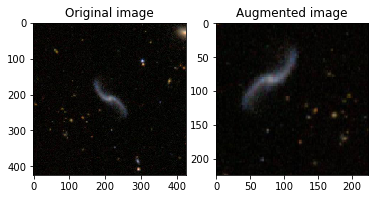

In [167]:
x , y = train_generator.next()

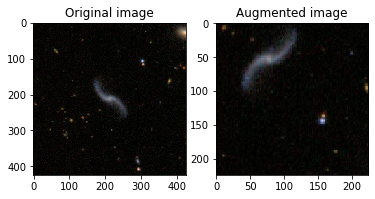

In [168]:
x , y = train_generator.next()

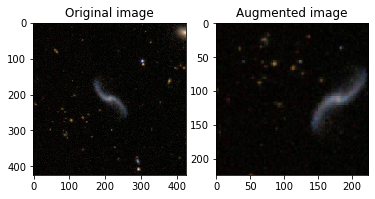

In [169]:
x , y = train_generator.next()

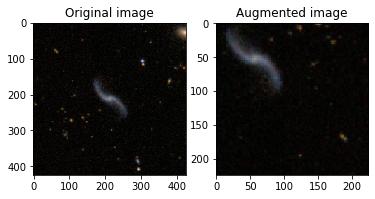

In [170]:
x , y = train_generator.next()

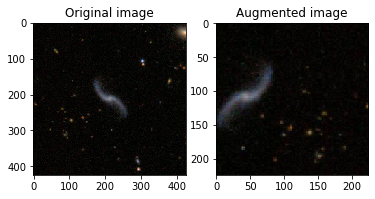

In [171]:
x , y = train_generator.next()

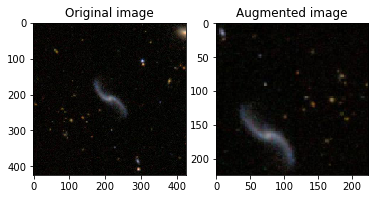

In [172]:
x , y = train_generator.next()

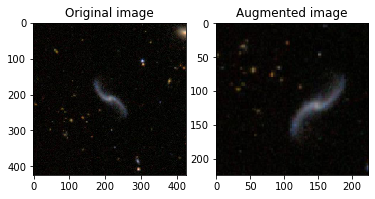

In [173]:
x , y = train_generator.next()

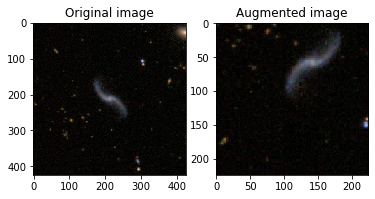

In [174]:
x , y = train_generator.next()

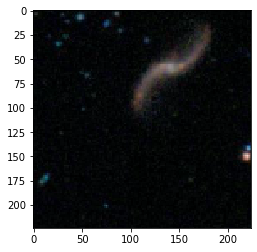

In [175]:
plt.imshow(x[0][...,::-1]) #original

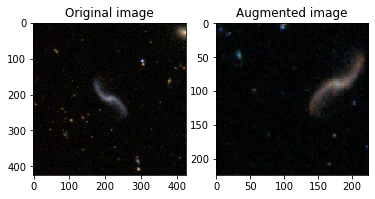

In [176]:
x , y = train_generator.next()
plt.imshow(x[0][...,::-1]) #Rotation enabled

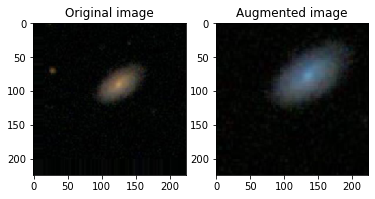

In [57]:
x , y = train_generator.next()
plt.imshow(x[0][...,::-1]) #rotation enabled

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
(2,)


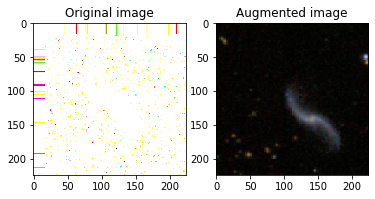

In [21]:
x , y = train_generator.next()
plt.imshow(x[0]) #Width shift

(2,)


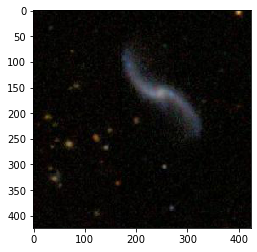

In [161]:
x , y = train_generator.next()
plt.imshow(x[0]) #whitening

In [153]:
import tensorflow as tf

In [130]:
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]

def new_generator(batches):
    while True:
        img, label = next(batches)
        new_img = np.zeros((img.shape[0],112,112,3))
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for i in range(img.shape[0]):
                white = tf.image.per_image_standardization(img[i])
                crop = tf.image.random_crop(white, [112,112,3])
                new_img[i] = sess.run(crop)
            
        yield(new_img, label)

In [131]:
train_generator_1 = new_generator(train_generator)

In [132]:
x, y = train_generator_1.__next__()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


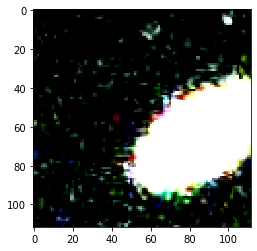

In [133]:
plt.imshow(x[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


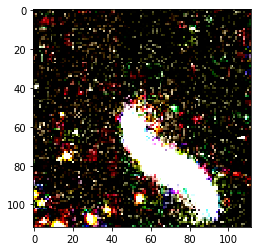

In [134]:
x, y = train_generator_1.__next__()
plt.imshow(x[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


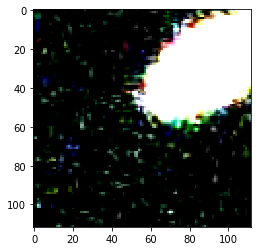

In [135]:
x, y = train_generator_1.__next__()
plt.imshow(x[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


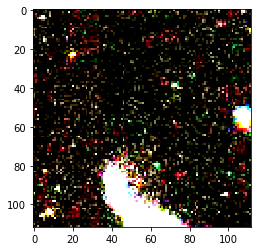

In [136]:
x, y = train_generator_1.__next__()
plt.imshow(x[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


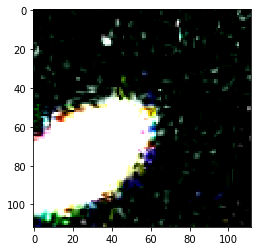

In [137]:
x, y = train_generator_1.__next__()
plt.imshow(x[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


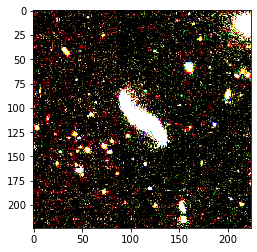

In [122]:
x, y = train_generator_1.__next__()
plt.imshow(x[0])